<a href="https://colab.research.google.com/github/souvik25162/ArimaAnnHybrid/blob/master/Hybridization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.6/dist-packages (0.12.0)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [ ]:
from google.colab import files
uploaded=files.upload()
df=pd.read_excel("germany.xlsx")

Saving germany.xlsx to germany (2).xlsx


In [ ]:
print("length of the dataset",df.shape)
print("minimum unemployment rate:",df['values'].min())
print("maximum unemployment rate:",df['values'].max())
df.head()

length of the dataset (468, 2)
minimum unemployment rate: 3.0
maximum unemployment rate: 12.1


,DATE,values
0,1980-01-01,3.1
1,1980-02-01,3.0
2,1980-03-01,3.1
3,1980-04-01,3.2
4,1980-05-01,3.3


In [ ]:
df['DATE']=pd.to_datetime(df['DATE'])

In [ ]:
ts=df.sort_values('DATE')
print(df.isnull().sum())
ts=df.set_index("DATE")
ts.head()

DATE      0
values    0
dtype: int64


,values
DATE,
1980-01-01,3.1
1980-02-01,3.0
1980-03-01,3.1
1980-04-01,3.2
1980-05-01,3.3


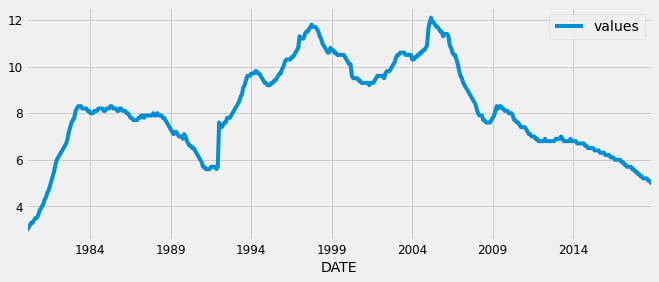

In [ ]:
ts.plot(figsize=(10,4))

In [ ]:
print(df['DATE'].max())

2018-12-01 00:00:00


In [ ]:
from statsmodels.tsa.stattools import adfuller,acf,pacf

def test_stationarity(series,mlag =None, lag = None,):
    print('ADF Test Result')
    res = adfuller(series, maxlag = mlag, autolag = lag)
    output = pd.Series(res[0:4],index = ['Test Statistic', 'p value', 'used lag', 'Number of observations used'])
    for key, value in res[4].items():
        output['Critical Value ' + key] = value
    print(output)

In [ ]:
test_stationarity(df['values'])

ADF Test Result
Test Statistic                  -1.923819
p value                          0.320940
used lag                        18.000000
Number of observations used    449.000000
Critical Value 1%               -3.444998
Critical Value 5%               -2.867999
Critical Value 10%              -2.570210
dtype: float64


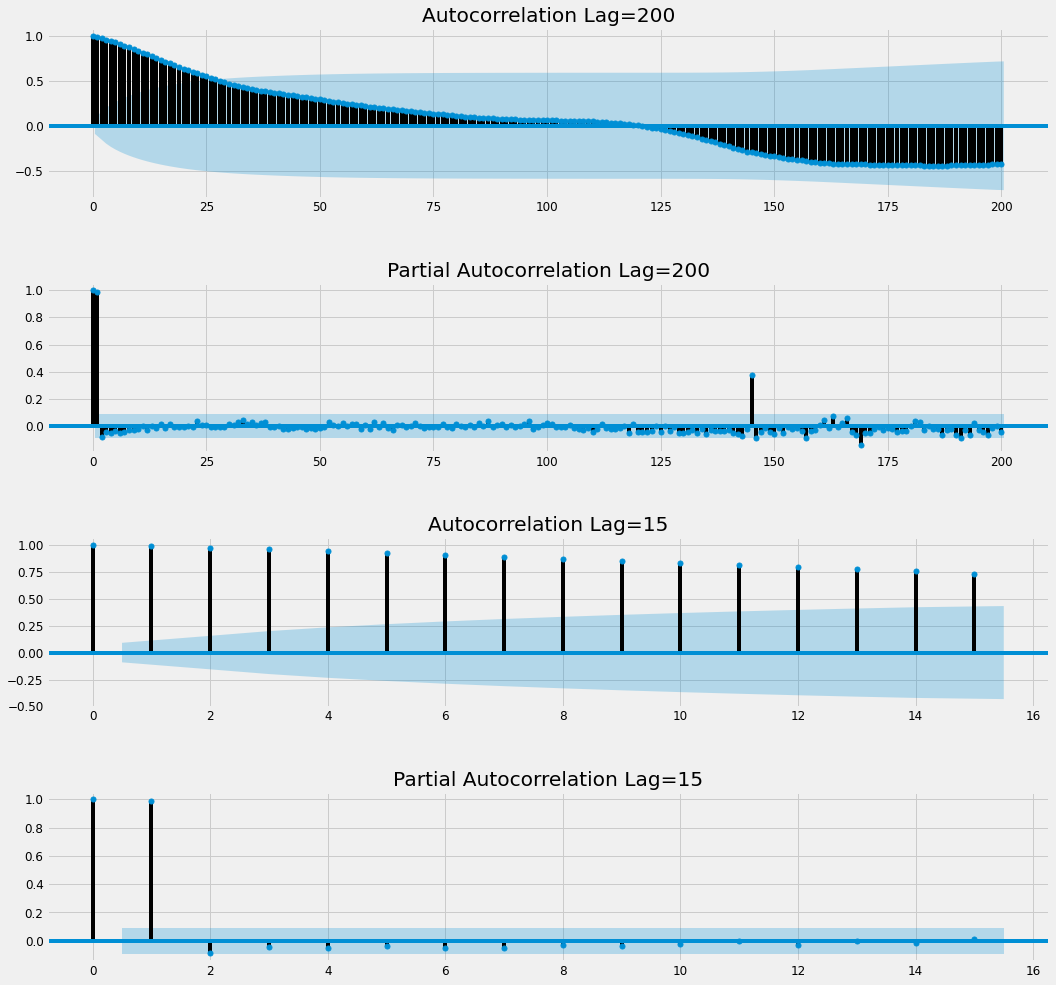

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(16,16))
ax1 = fig.add_subplot(411)
fig = plot_acf(df['values'],lags=200,ax=ax1)
plt.title('Autocorrelation Lag=200')
ax2 = fig.add_subplot(412)
fig = plot_pacf(df['values'],lags=200,ax=ax2)
plt.title('Partial Autocorrelation Lag=200')
ax3 = fig.add_subplot(413)
fig = plot_acf(df['values'],lags=15,ax=ax3)
plt.title('Autocorrelation Lag=15')
ax4 = fig.add_subplot(414)
fig = plot_pacf(df['values'],lags=15,ax=ax4)
plt.title('Partial Autocorrelation Lag=15')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=None, hspace=0.5)
plt.show()

In [ ]:
train=ts[0:432]
test= ts[432:len(ts)]
test1=ts[432:444]
test2=ts[432:456]

In [ ]:
timeseries =train['values']
p,d,q = (4,1,1)
arima_mod = ARIMA(timeseries,(p,d,q)).fit()
summary = (arima_mod.summary2(alpha=.05, float_format="%.8f"))
print(summary)

                           Results: ARIMA
Model:              ARIMA            BIC:                 -473.6487 
Dependent Variable: D.values         Log-Likelihood:      258.06    
Date:               2020-08-31 14:44 Scale:               1.0000    
No. Observations:   431              Method:              css-mle   
Df Model:           6                Sample:              02-01-1980
Df Residuals:       425                                   12-01-2015
Converged:          1.0000           S.D. of innovations: 0.133     
No. Iterations:     15.0000          HQIC:                -490.873  
AIC:                -502.1114                                       
---------------------------------------------------------------------
                  Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
---------------------------------------------------------------------
const             0.0076    0.0184   0.4117  0.6805  -0.0285   0.0436
ar.L1.D.values    0.7924    0.1424   5.5635  0.0000   0.5

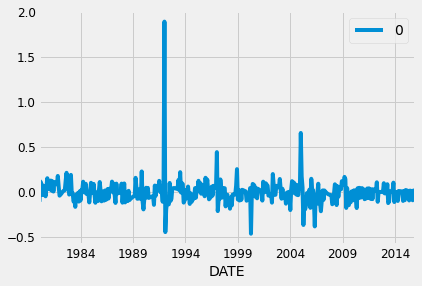

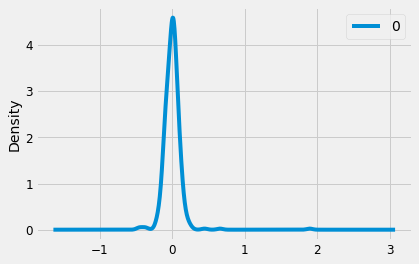

                0
count  431.000000
mean    -0.000179
std      0.133095
min     -0.461973
25%     -0.064757
50%      0.001262
75%      0.043781
max      1.893823


In [ ]:
residuals= pd.DataFrame(arima_mod.resid)
residuals.plot()
plt.show()

residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
test.head()

,values
DATE,
2016-01-01,6.2
2016-02-01,6.2
2016-03-01,6.2
2016-04-01,6.2
2016-05-01,6.1


In [ ]:
train=train.values
test=test.values
test1=test1.values
test2=test2.values

In [ ]:
history=[x for x in train]
predictions=list()

for t in range(len(test)):
  model=ARIMA(history,order=(4,1,1))
  model_fit=model.fit(disp=0)
  output=model_fit.forecast()
  yhat=output[0]
  predictions.append(yhat)
  obs=test[t]
  history.append(obs)
  print('predicted=%f, expected=%f'%(yhat,obs))

predicted=6.290113, expected=6.200000
predicted=6.181387, expected=6.200000
predicted=6.185732, expected=6.200000
predicted=6.187078, expected=6.200000
predicted=6.189862, expected=6.100000
predicted=6.081236, expected=6.100000
predicted=6.085612, expected=6.100000
predicted=6.086979, expected=6.000000
predicted=5.976879, expected=6.000000
predicted=5.982684, expected=6.000000
predicted=5.984854, expected=6.000000
predicted=5.988351, expected=6.000000
predicted=5.993057, expected=5.900000
predicted=5.883357, expected=5.900000
predicted=5.886955, expected=5.800000
predicted=5.774927, expected=5.800000
predicted=5.778766, expected=5.700000
predicted=5.669630, expected=5.700000
predicted=5.674989, expected=5.700000
predicted=5.679898, expected=5.700000
predicted=5.684847, expected=5.600000
predicted=5.577901, expected=5.600000
predicted=5.582973, expected=5.500000
predicted=5.472583, expected=5.500000
predicted=5.476666, expected=5.400000
predicted=5.368552, expected=5.400000
predicted=5.

In [ ]:
from sklearn.metrics import mean_squared_error
error=mean_squared_error(test,predictions)
print("MSE:",error)

print("RMSE:",np.sqrt(error))

MSE: 0.0028555560690216057
RMSE: 0.05343740327730761


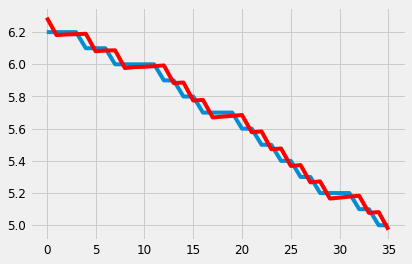

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [ ]:
history=[x for x in train]
predictions1=list()

for t in range(len(test1)):
  model=ARIMA(history,order=(4,1,1))
  model_fit2=model.fit(disp=0)
  output=model_fit2.forecast()
  yhat=output[0]
  predictions1.append(yhat)
  obs=test1[t]
  history.append(obs)
  print('predicted=%f, expected=%f'%(yhat,obs))

predicted=6.290113, expected=6.200000
predicted=6.181387, expected=6.200000
predicted=6.185732, expected=6.200000
predicted=6.187078, expected=6.200000
predicted=6.189862, expected=6.100000
predicted=6.081236, expected=6.100000
predicted=6.085612, expected=6.100000
predicted=6.086979, expected=6.000000
predicted=5.976879, expected=6.000000
predicted=5.982684, expected=6.000000
predicted=5.984854, expected=6.000000
predicted=5.988351, expected=6.000000


In [ ]:
from sklearn.metrics import mean_squared_error
error2=mean_squared_error(test1,predictions1)
print("MSE:",error2)

print("RMSE:",np.sqrt(error2))

MSE: 0.002186370750267951
RMSE: 0.04675864358883768


In [ ]:
history=[x for x in train]
predictions2=list()

for t in range(len(test2)):
  model=ARIMA(history,order=(4,1,0))
  model_fit2=model.fit(disp=0)
  output=model_fit2.forecast()
  yhat=output[0]
  predictions2.append(yhat)
  obs=test2[t]
  history.append(obs)
  print('predicted=%f, expected=%f'%(yhat,obs))

predicted=6.290699, expected=6.200000
predicted=6.188322, expected=6.200000
predicted=6.189414, expected=6.200000
predicted=6.188661, expected=6.200000
predicted=6.190439, expected=6.100000
predicted=6.088217, expected=6.100000
predicted=6.089306, expected=6.100000
predicted=6.088556, expected=6.000000
predicted=5.975274, expected=6.000000
predicted=5.989204, expected=6.000000
predicted=5.988307, expected=6.000000
predicted=5.990102, expected=6.000000
predicted=6.002921, expected=5.900000
predicted=5.888011, expected=5.900000
predicted=5.889079, expected=5.800000
predicted=5.773326, expected=5.800000
predicted=5.776026, expected=5.700000
predicted=5.673330, expected=5.700000
predicted=5.675725, expected=5.700000
predicted=5.688055, expected=5.700000
predicted=5.689690, expected=5.600000
predicted=5.587791, expected=5.600000
predicted=5.588551, expected=5.500000
predicted=5.473232, expected=5.500000


In [ ]:
error3=mean_squared_error(test2,predictions2)
print("MSE:",error3)

print("RMSE:",np.sqrt(error3))

MSE: 0.0028832448751351675
RMSE: 0.053695855288235866


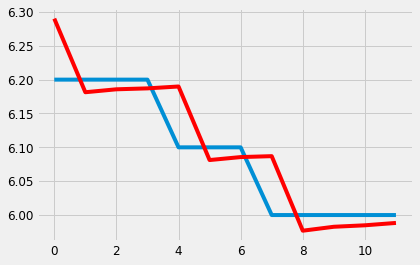

In [ ]:
plt.plot(test1)
plt.plot(predictions1, color='red')
plt.show()

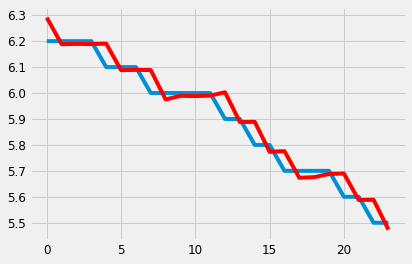

In [ ]:
plt.plot(test2)
plt.plot(predictions2, color='red')
plt.show()

# Auto regressive time series model

yhat=b0+b1*x1
where yhat is the prediction. b0 & b1 are coefficients found by optimizing the model on training data.

we can plot obs. at the previous time step i.e t-1 & next time step t+1 as a scatter plot.

lag_plot(series) serves the purpose

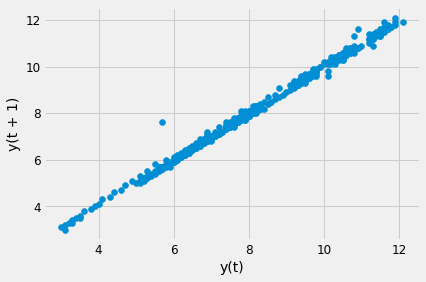

In [ ]:
from pandas.plotting import lag_plot
lag_plot(ts)
plt.show()

In [ ]:
values=pd.DataFrame(ts.values)
dataframe= pd.concat([values.shift(1),values],axis=1)
dataframe.columns=['t-1','t+1']
result=dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.997464
t+1  0.997464  1.000000


This shows a strong positive correlation between observation & lag=1 value.
but it's a tedious approach. so go with autocorrelation_plot()


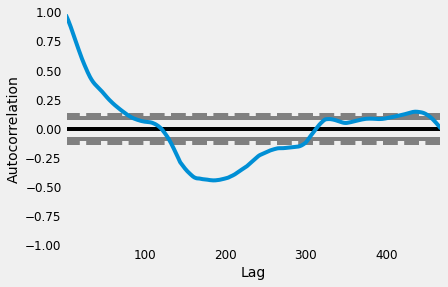

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ts)
plt.show()

pip install statsmodels --upgrade

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
x=ts.values

train,test= x[0:len(x)-36],x[len(x)-36:]

In [ ]:
model= AutoReg(train,lags=30)
model_fit=model.fit()
print("coefficients: %s" % model_fit.params)

coefficients: [ 7.19902844e-02  1.10243701e+00 -1.17766861e-02  1.66815133e-02
 -1.82252807e-02 -5.66877482e-02  8.05778979e-02 -1.05545326e-01
 -1.09482067e-03 -1.36417357e-02  5.86119860e-03  4.55960190e-02
 -1.03888674e-01  5.54042037e-02 -2.98701472e-02  2.53885235e-02
 -2.04261678e-02 -1.18006531e-02  1.00025049e-01 -1.94816746e-02
  5.15523818e-03 -4.08244499e-03 -9.55065479e-02  3.84125263e-02
 -5.47298380e-02  6.24174008e-02  2.42273270e-02 -2.15132709e-02
  1.01276935e-02 -5.99749023e-02  4.74629053e-02]


In [ ]:
predictions_A= model_fit.predict(start=len(train),end=(len(train)+len(test)-1),dynamic=False)

for i in range(len(predictions_A)):
  print('predicted=%f,expected=%f'%(predictions_A[i],test[i]))

predicted=6.304507,expected=6.200000
predicted=6.326515,expected=6.200000
predicted=6.340045,expected=6.200000
predicted=6.351274,expected=6.200000
predicted=6.381908,expected=6.100000
predicted=6.393254,expected=6.100000
predicted=6.411366,expected=6.100000
predicted=6.432960,expected=6.000000
predicted=6.469306,expected=6.000000
predicted=6.512788,expected=6.000000
predicted=6.543580,expected=6.000000
predicted=6.576477,expected=6.000000
predicted=6.609347,expected=5.900000
predicted=6.639055,expected=5.900000
predicted=6.677484,expected=5.800000
predicted=6.709950,expected=5.800000
predicted=6.749960,expected=5.700000
predicted=6.781176,expected=5.700000
predicted=6.818182,expected=5.700000
predicted=6.856123,expected=5.700000
predicted=6.898923,expected=5.600000
predicted=6.940545,expected=5.600000
predicted=6.978552,expected=5.500000
predicted=7.015314,expected=5.500000
predicted=7.051528,expected=5.400000
predicted=7.092462,expected=5.400000
predicted=7.128544,expected=5.300000
p

In [ ]:
mse= mean_squared_error(test,predictions_A)
print("MSE36:",mse)
print("RMSE36:",np.sqrt(mse))

MSE36: 1.9055528260789525
RMSE36: 1.3804176274153241


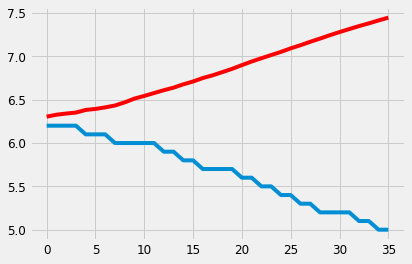

In [ ]:
plt.plot(test)
plt.plot(predictions_A,color='red')
plt.show()

#Time for Bayesian

In [ ]:
df['DATE']=pd.to_datetime(df['DATE'])
df['Month']=df['DATE'].dt.month

In [ ]:
df.head(13)

,DATE,values,Month
0,1980-01-01,3.1,1
1,1980-02-01,3.0,2
2,1980-03-01,3.1,3
3,1980-04-01,3.2,4
4,1980-05-01,3.3,5
5,1980-06-01,3.3,6
6,1980-07-01,3.4,7
7,1980-08-01,3.5,8
8,1980-09-01,3.5,9
9,1980-10-01,3.6,10


In [ ]:
ts=df['values']

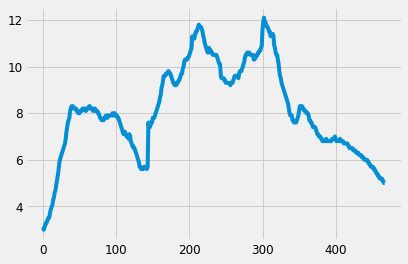

In [ ]:
ts.plot()

In [ ]:
y1=ts.values
x1=ts.index.values
x=x1.reshape(-1,1)
y=y1.reshape(-1,1)
from sklearn.linear_model import LinearRegression


In [ ]:
reg=LinearRegression().fit(x,y)

In [ ]:
print("cofficient is:",reg.coef_)
print("reg_intercept:",reg.intercept_)

cofficient is: [[0.00054695]]
reg_intercept: [8.00305615]


In [ ]:
y_reg= 8 + 0.0005*x1

In [ ]:
x1=np.array(x1)
y1=np.array(y1)

In [ ]:
def plot_df(x,y,y_reg,title='',xlabel='month',ylabel='value',dpi=100):
  plt.figure(figsize=(6,4),dpi=dpi)
  plt.plot(x,y_reg,color='tab:red')
  plt.plot(x,y,color='tab:blue')
  plt.gca().set(title=title,xlabel=xlabel,ylabel=ylabel)
  plt.show()

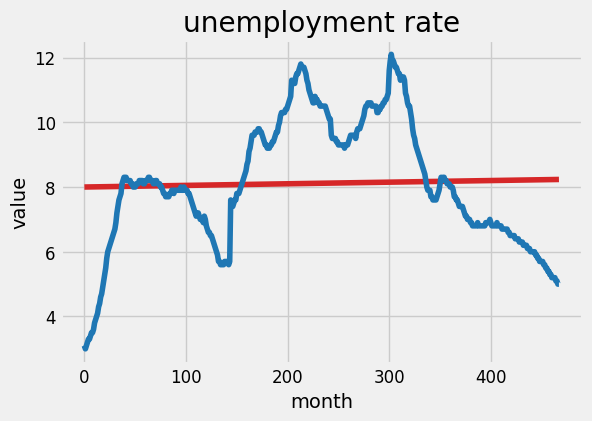

In [ ]:
plot_df(x=x1,y=y1,y_reg=y_reg,title='unemployment rate')

In [ ]:
import pymc3 as pm

In [ ]:
beta=8
alpha=0.0005

In [ ]:
df = ...
# pm.Normal('alpha', mu=0, sd=100) is random variable, named `alpha`,
# pm.Normal.dist(...) is distribution object used to create random variables
priors = {"Intercept": pm.Normal.dist(mu=8, sd=10),
          "Regressor": pm.Normal.dist(mu=0.005,sd=10)
          }

In [ ]:
pip install pymc3 --upgrade

In [ ]:
with pm.Model() as model:
  df =priors = {"beta": pm.Normal.dist(mu=8, sd=10),
          "alpha": pm.Normal.dist(mu=0.005,sd=10)
          }
  beta=pm.Normal('beta',mu= 8, sd=10)
  alpha=pm.Normal('alpha',mu=0.0005,sd=10)
  mean=pm.Deterministic("mean",alpha+beta*x)
  std= pm.Uniform('std',lower=0,upper=10)     
  obs=pm.Normal("obs",mu=mean,sd=std,observed=y)
  trace=pm.sample(100000,step=pm.Metropolis())
  burned_trace=trace[20000:]

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [std]
>Metropolis: [alpha]
>Metropolis: [beta]


Sampling 2 chains for 1_000 tune and 100_000 draw iterations (2_000 + 200_000 draws total) took 138 seconds.
INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock
The estimated number of effective samples is smaller than 200 for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd790eb17f0>,
      dtype=object)

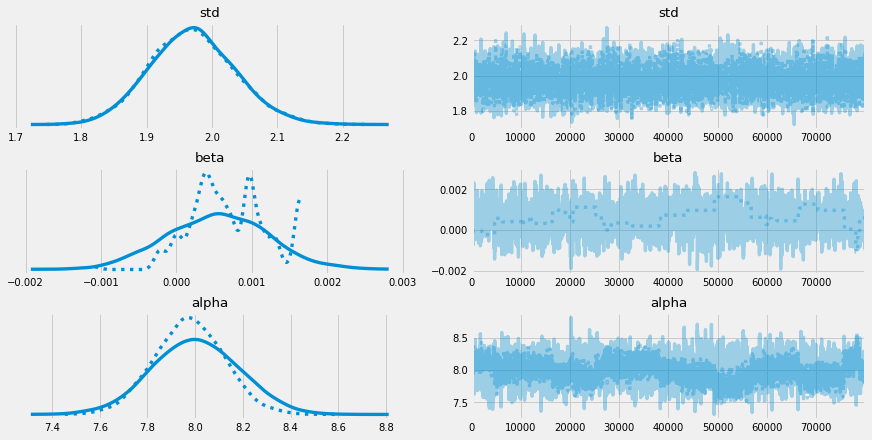

In [ ]:
pm.plots.traceplot(burned_trace,varnames=['std','beta','alpha'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7980216a0>,
      dtype=object)

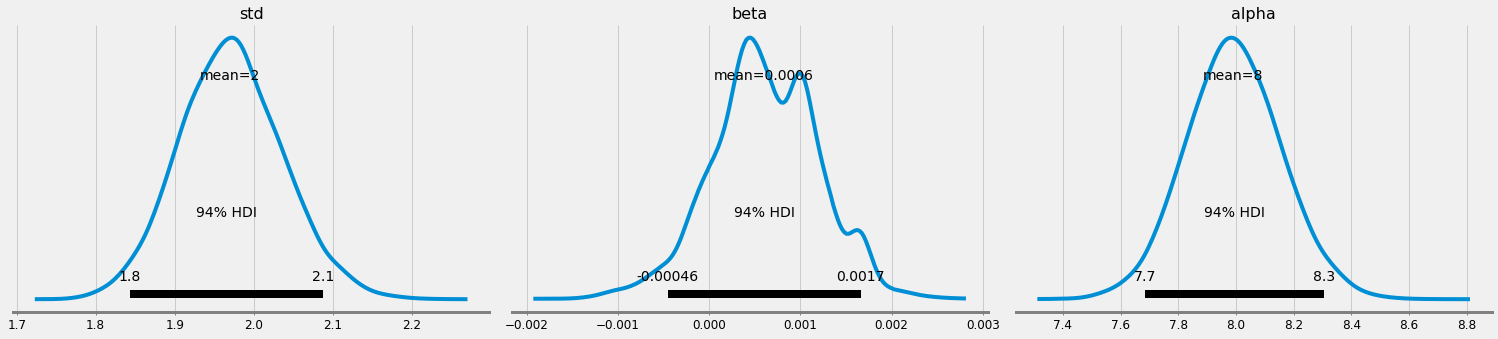

In [ ]:
pm.plot_posterior(burned_trace,varnames=['std','beta','alpha'])

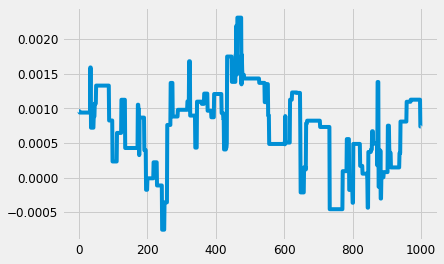

In [ ]:
beta_trace=burned_trace['beta']
pd.Series(beta_trace[:1000]).plot()

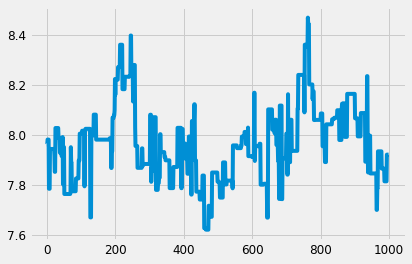

In [ ]:
alpha_trace=burned_trace['alpha']
pd.Series(alpha_trace[:1000]).plot()

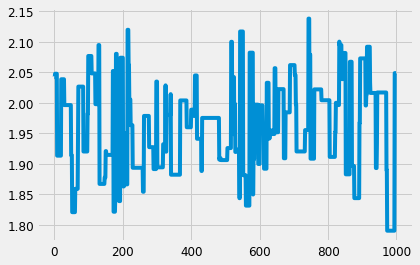

In [ ]:
std_trace=burned_trace['std']
pd.Series(std_trace[:1000]).plot()

In [ ]:
std_mean=std_trace.mean()
print(std_mean)
beta_mean=beta_trace.mean()
print(beta_mean)
alpha_mean=alpha_trace.mean()
print(alpha_mean)

1.970325654137656
0.0006020006258174603
7.989691203505533


In [ ]:
train=train.values
test=test.values
test1=test1.values
test2=test2.values

In [ ]:
len(train)

432

Unemployment(t)=beta_mean*t +alpha_mean+error

In [ ]:
length=36
x1=np.arange(length)
mean_trace=alpha_mean+ beta_mean*x1
normal_dist=pm.Normal.dist(0,sd=std_mean)
errors=normal_dist.random(size=length)
Y_gen= mean_trace+ errors
Y_reg1=mean_trace

INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock


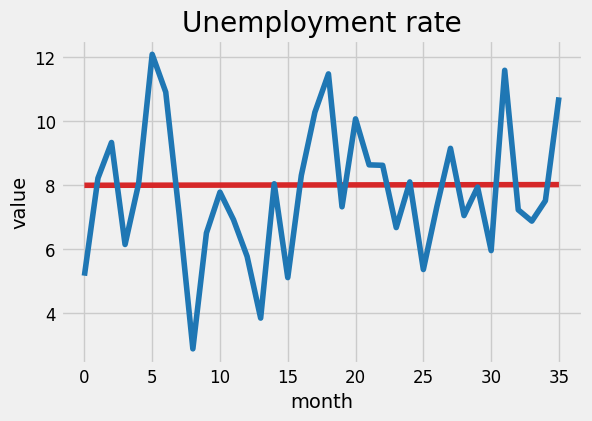

In [ ]:
plot_df(x=x1,y=Y_gen,y_reg=Y_reg1,title='Unemployment rate')

In [ ]:
len(Y_reg1)

36

In [ ]:
len(test)

36

In [ ]:
from sklearn.metrics import mean_squared_error
errorb= mean_squared_error(test,Y_reg1)
print(errorb)

5.61001688428719


In [ ]:
print("RMSE:",np.sqrt(errorb))

RMSE: 2.36854742073854


In [ ]:
print(error)

0.0028555560690216057


MSE & RMSE FOR ARIMA
MSE: 0.0028555560690216057
RMSE: 0.05343740327730761

In [ ]:
pred_new=(predictions+Y_reg1)/2

In [ ]:
error_new= mean_squared_error(test,pred_new[1])
print(error_new)

2.185232675872525


In [ ]:
print(np.sqrt(error_new))

1.4782532516022162


#Bayesian Neural Network

In [ ]:
x=ts.values

train,test= x[0:len(x)-36],x[len(x)-36:]

In [ ]:
import theano
import theano.tensor as T
ann_input= theano.shared(train)
ann_output= theano.shared(test)

In [ ]:
ann_input

<TensorType(float64, vector)>

In [ ]:
with pm.Model() as model:
  init_1=np.random.randn(x.shape[1],3)
  

In [ ]:
ann_input.set_value(train)
ann_output.set_value(test)

In [ ]:
ppc=pm.sample_posterior_predictive(trace,model=model,samples=500)

INFO (theano.gof.compilelock): Refreshing lock /root/.theano/compiledir_Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.6.9-64/lock_dir/lock


#LSTM